# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import defaultdict
import platform
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  
mpl.rcParams['axes.unicode_minus'] = False

# HitMap

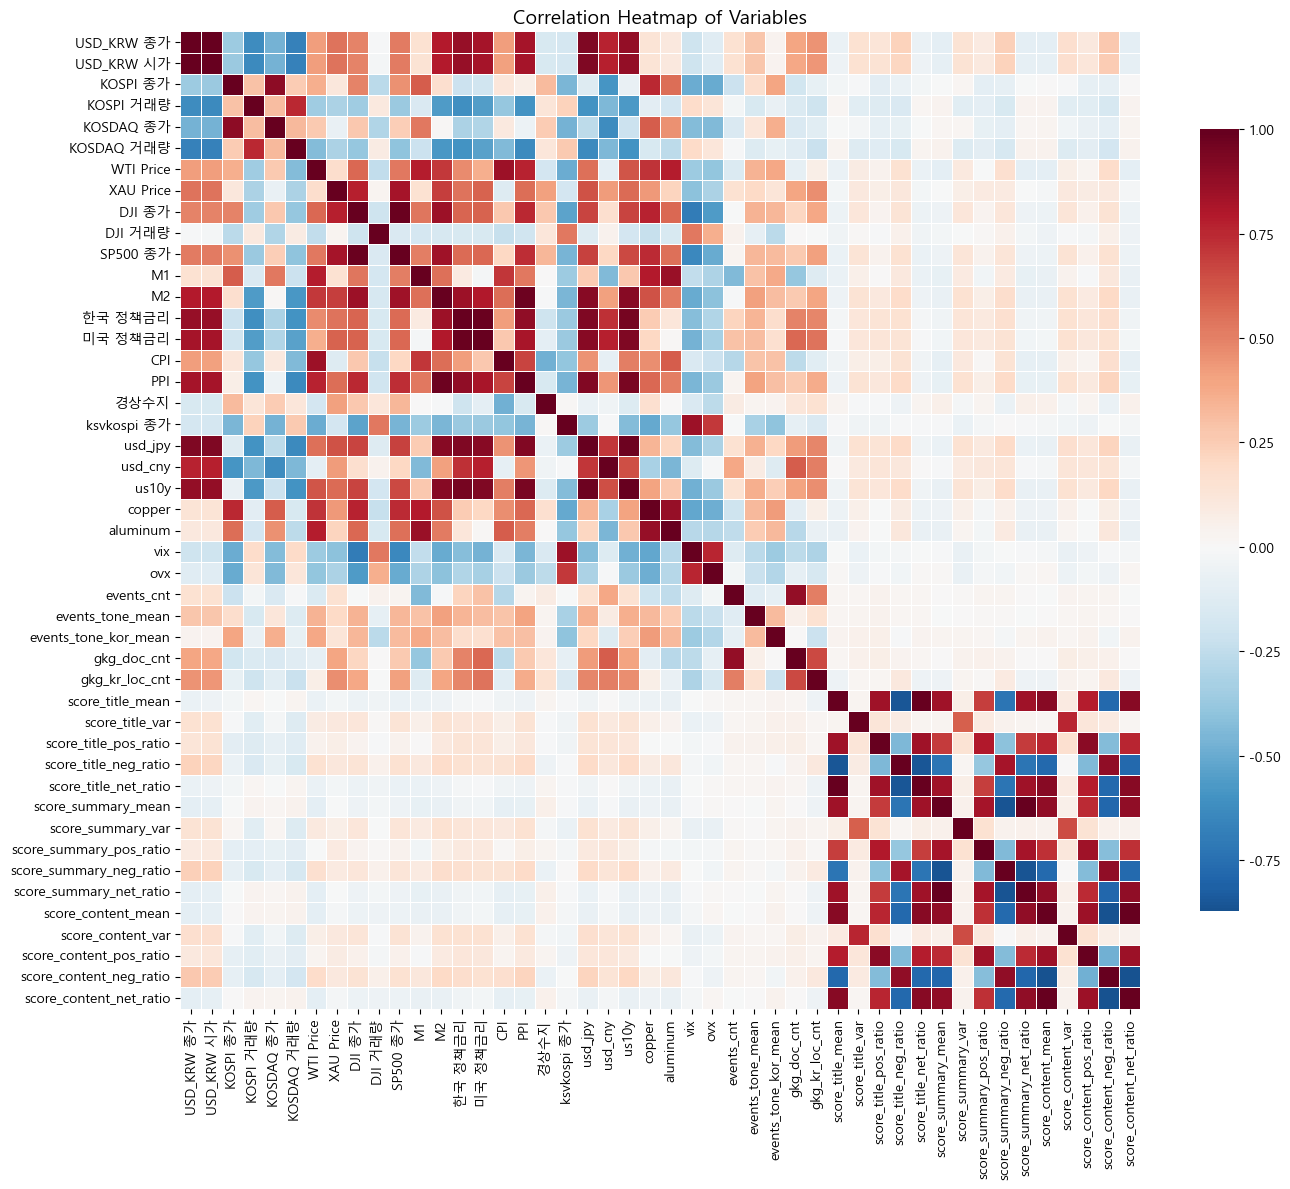

In [8]:
# 데이터 로드
CSV_PATH   = "df_0820_final.csv"
DATE_COL   = "date"
TARGET_COL = "USD_KRW 종가"

# Load dataset
df = pd.read_csv(CSV_PATH, encoding="utf-8-sig")
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

# 숫자형 변수만 선택 (타깃 포함)
num_df = df.select_dtypes(include=[np.number]).copy()

# news_count 제거
if "news_count" in num_df.columns:
    num_df = num_df.drop(columns=["news_count"])

# 결측치 제거
num_df = num_df.dropna()

# 상관관계 계산 (피어슨)
corr = num_df.corr(method="pearson")

# 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="RdBu_r", center=0, annot=False, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Variables", fontsize=14)
plt.tight_layout()
plt.show()

# ForeCasting(Table 8,9)

[ExcludePos24_47] lookback=5 LSTM shift=1 seed=42 -> RMSE=7.513, MAE=5.809, MAPE=0.425
[ExcludePos24_47] lookback=5 LSTM shift=1 seed=55 -> RMSE=7.142, MAE=5.398, MAPE=0.396
[ExcludePos24_47] lookback=5 LSTM shift=1 seed=68 -> RMSE=7.126, MAE=5.436, MAPE=0.399
[ExcludePos24_47] lookback=5 GRU shift=1 seed=42 -> RMSE=7.466, MAE=5.761, MAPE=0.422
[ExcludePos24_47] lookback=5 GRU shift=1 seed=55 -> RMSE=7.361, MAE=5.676, MAPE=0.416
[ExcludePos24_47] lookback=5 GRU shift=1 seed=68 -> RMSE=7.369, MAE=5.641, MAPE=0.414
[ExcludePos24_47] lookback=5 CNN_LSTM shift=1 seed=42 -> RMSE=7.167, MAE=5.412, MAPE=0.397
[ExcludePos24_47] lookback=5 CNN_LSTM shift=1 seed=55 -> RMSE=7.361, MAE=5.555, MAPE=0.408
[ExcludePos24_47] lookback=5 CNN_LSTM shift=1 seed=68 -> RMSE=7.116, MAE=5.408, MAPE=0.397
[ExcludePos24_47] lookback=5 CNN_GRU shift=1 seed=42 -> RMSE=8.344, MAE=6.483, MAPE=0.476
[ExcludePos24_47] lookback=5 CNN_GRU shift=1 seed=55 -> RMSE=7.251, MAE=5.457, MAPE=0.401
[ExcludePos24_47] lookback=5

,case,lookback,model,shift,seed,MSE,RMSE,MAE,MAPE(%)
9,ExcludePos24_47,5,CNN_GRU,1,42,69.619995,8.343860,6.482514,0.476482
10,ExcludePos24_47,5,CNN_GRU,1,55,52.571041,7.250589,5.457162,0.400642
11,ExcludePos24_47,5,CNN_GRU,1,68,57.155277,7.560111,5.736675,0.420849
6,ExcludePos24_47,5,CNN_LSTM,1,42,51.360180,7.166602,5.411821,0.397352
7,ExcludePos24_47,5,CNN_LSTM,1,55,54.191254,7.361471,5.554917,0.407666
...,...,...,...,...,...,...,...,...,...
208,Include_Summary,90,GRU,1,55,60.105427,7.752769,5.951476,0.433428
209,Include_Summary,90,GRU,1,68,59.498650,7.713537,5.936215,0.431385
204,Include_Summary,90,LSTM,1,42,67.069748,8.189612,6.341028,0.461521
205,Include_Summary,90,LSTM,1,55,55.577370,7.455023,5.634352,0.410215



=== Aggregated by (case, lookback, model, shift) ===


,case,lookback,model,shift,MSE_mean,MSE_std,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std,n
0,ExcludePos24_47,5,CNN_GRU,1,59.782104,8.822804,7.718187,0.563517,5.892117,0.530055,0.432658,0.039275,3
1,ExcludePos24_47,5,CNN_LSTM,1,52.064075,1.876978,7.214769,0.129519,5.458151,0.083827,0.400604,0.006122,3
2,ExcludePos24_47,5,GRU,1,54.741767,0.861110,7.398616,0.058065,5.692713,0.061757,0.416987,0.004277,3
3,ExcludePos24_47,5,LSTM,1,52.746677,3.209924,7.260486,0.219156,5.547602,0.226900,0.406777,0.016067,3
4,ExcludePos24_47,10,CNN_GRU,1,51.628451,1.315634,7.184906,0.091405,5.490333,0.111665,0.402274,0.007817,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Include_Summary,60,LSTM,1,67.618351,11.820150,8.202259,0.715508,6.281974,0.631689,0.458251,0.046329,3
92,Include_Summary,90,CNN_GRU,1,58.101768,8.047739,7.610677,0.518695,5.785916,0.447050,0.420711,0.031795,3
93,Include_Summary,90,CNN_LSTM,1,59.899459,11.818659,7.715524,0.745128,5.918031,0.623524,0.431096,0.045968,3
94,Include_Summary,90,GRU,1,62.747458,5.110630,7.917043,0.319111,6.149222,0.355804,0.446619,0.024638,3



=== Aggregated by (case, lookback, shift) — models averaged ===


,case,lookback,shift,MSE_mean,MAPE_mean,n
6,Include_GDELT,5,1,52.479801,0.405694,12
12,Include_GDELT_Summary,5,1,53.590648,0.408921,12
0,ExcludePos24_47,5,1,54.833656,0.414256,12
18,Include_Summary,5,1,56.672678,0.422018,12
7,Include_GDELT,10,1,52.464776,0.406626,12
19,Include_Summary,10,1,52.598089,0.406816,12
13,Include_GDELT_Summary,10,1,52.786881,0.406674,12
1,ExcludePos24_47,10,1,54.220277,0.415916,12
14,Include_GDELT_Summary,20,1,49.940599,0.401737,12
2,ExcludePos24_47,20,1,50.514034,0.401960,12


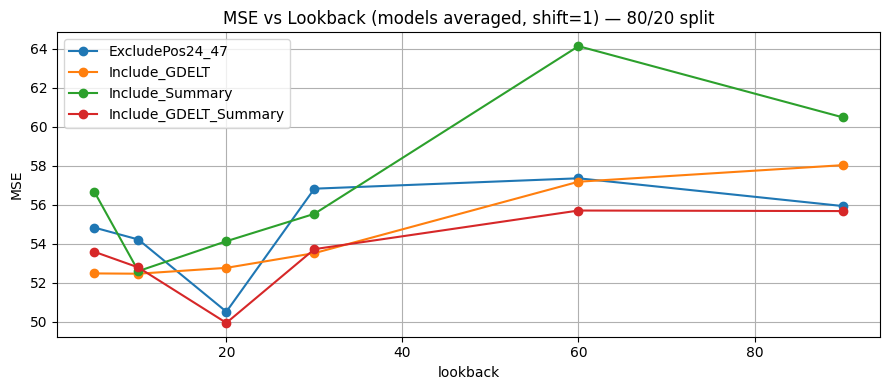


=== Table A. Model-wise performance (sorted by MSE_mean) ===


,case,lookback,model,shift,MSE_mean,RMSE_mean,MAPE_mean,n
0,Include_GDELT_Summary,20,CNN_LSTM,1,47.711801,6.907359,0.390860,3
1,ExcludePos24_47,20,CNN_GRU,1,48.835108,6.988105,0.394033,3
2,Include_GDELT,30,CNN_LSTM,1,49.254826,7.018164,0.395459,3
3,Include_Summary,20,LSTM,1,49.451321,7.031776,0.396511,3
4,ExcludePos24_47,20,CNN_LSTM,1,49.452279,7.032226,0.397167,3
...,...,...,...,...,...,...,...,...
91,Include_Summary,60,CNN_GRU,1,64.095305,7.998753,0.447334,3
92,Include_Summary,20,CNN_GRU,1,64.192238,7.957842,0.452444,3
93,Include_GDELT,90,LSTM,1,65.953195,8.048487,0.452337,3
94,Include_Summary,60,CNN_LSTM,1,67.395233,8.190642,0.455086,3



=== Table B. Case/Lookback performance (models averaged) ===


,case,lookback,shift,MSE_mean,MAPE_mean,n
0,Include_GDELT,5,1,52.479801,0.405694,12
1,Include_GDELT_Summary,5,1,53.590648,0.408921,12
2,ExcludePos24_47,5,1,54.833656,0.414256,12
3,Include_Summary,5,1,56.672678,0.422018,12
4,Include_GDELT,10,1,52.464776,0.406626,12
5,Include_Summary,10,1,52.598089,0.406816,12
6,Include_GDELT_Summary,10,1,52.786881,0.406674,12
7,ExcludePos24_47,10,1,54.220277,0.415916,12
8,Include_GDELT_Summary,20,1,49.940599,0.401737,12
9,ExcludePos24_47,20,1,50.514034,0.401960,12



=== Best configuration (by lowest MSE_mean) ===
case=Include_GDELT_Summary, lookback=20, model=CNN_LSTM, shift=1
MSE_mean=47.712, RMSE_mean=6.907, MAPE_mean=0.391

=== Best configuration — re-fit on train, predict on test ===
Test Metrics: MSE=47.944, RMSE=6.924, MAE=5.307, MAPE=0.389


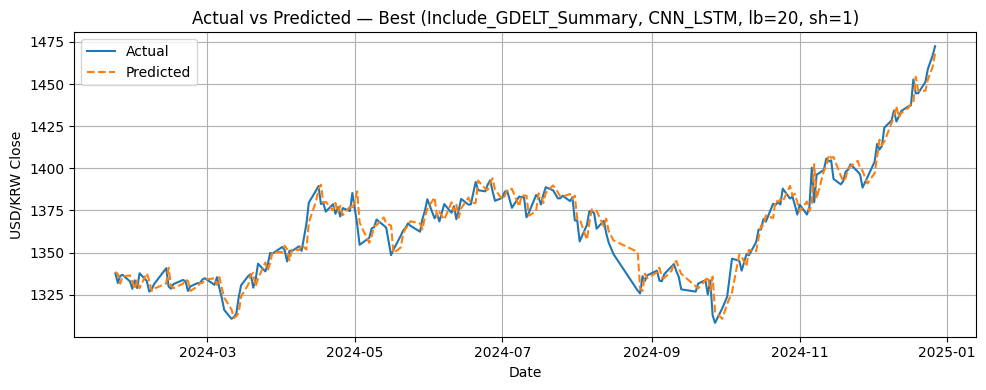

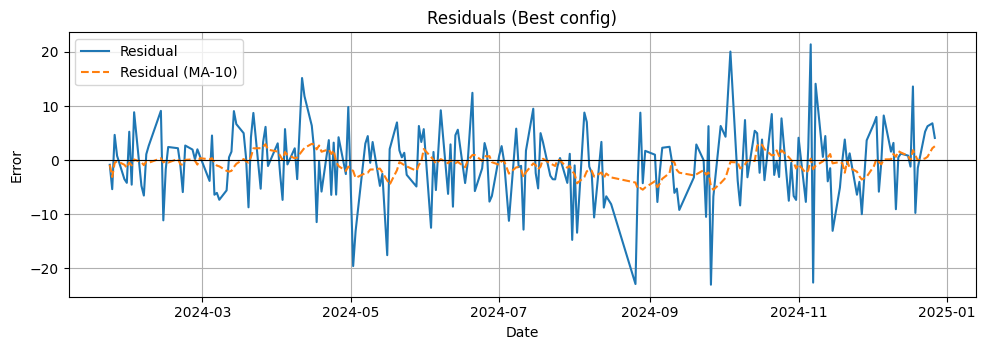

In [1]:
try:
    get_ipython().run_line_magic("matplotlib", "inline")
except Exception:
    pass

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# =========================
# 설정
# =========================
CSV_PATH   = "df_0820_final.csv"
DATE_COL   = "date"
TARGET_COL = "USD_KRW 종가"

LOOKBACK_LIST = [5, 10, 20, 30, 60, 90]   # 필요시 수정
SHIFT_LIST    = [1]                       # 0=동일일, 1=다음날, 2=이틀 후
EPOCHS        = 80
BATCH         = 64
SEEDS         = [42, 55, 68]
MODEL_LIST    = ["LSTM", "GRU", "CNN_LSTM", "CNN_GRU"]

# 80/20 분할(외부 val 없음; 내부 val은 시퀀스 10% 사용)
TRAIN_RATIO = 0.8
VAL_RATIO   = 0.0  

# 조합 축소: Baseline, +GDELT, +Summary, +GDELT+Summary
CASES = [
    "ExcludePos24_47",       # Baseline (Reduced Features)
    "Include_GDELT",         # Baseline + GDELT
    "Include_Summary",       # Baseline + Summary
    "Include_GDELT_Summary", # Baseline + GDELT + Summary
]

# =========================
# 피처 그룹 유틸
# =========================
GDELT_COLS = [
    "events_cnt", "events_tone_mean", "events_tone_kor_mean",
    "gkg_doc_cnt", "gkg_kr_loc_cnt"
]

def get_summary_cols(df):
    return [c for c in df.columns if c.startswith("score_summary_")]

def get_all_senti_like_cols(df):
    cols = [c for c in df.columns if c.startswith("score_title_")
                                 or c.startswith("score_summary_")
                                 or c.startswith("score_content_")]
    if "news_count" in df.columns:
        cols.append("news_count")
    cols = list(set(cols) | set([c for c in GDELT_COLS if c in df.columns]))
    return cols

# =========================
# 공통 유틸
# =========================
def eval_metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    return dict(MSE=mse, RMSE=rmse, MAE=mae, MAPE=mape)

def split_indices(n, tr_ratio=0.8, va_ratio=0.0):
    n_test = int(n * (1 - tr_ratio - va_ratio))
    n_val  = int(n * va_ratio)
    n_tr   = n - n_val - n_test
    return slice(0, n_tr), slice(n_tr, n_tr+n_val), slice(n_tr+n_val, n)

def make_sequences_residual(X, y, lookback, shift=1):
    """
    shift = 예측 시차(0: y_t, 1: y_{t+1}, 2: y_{t+2} ...)
    Δ-타깃 = y[target] - y[target-1]
    최종 yhat = p_last + d_pred (p_last = y[target-1])
    """
    X_seq, y_d, p_last, y_true = [], [], [], []
    n = len(y)
    max_i = n - lookback - shift
    for i in range(max_i):
        idx_last   = i + lookback - 1
        target_idx = idx_last + shift
        prev_idx   = target_idx - 1
        X_seq.append(X[i:i+lookback])
        y_d.append(y[target_idx] - y[prev_idx])
        p_last.append(y[prev_idx])
        y_true.append(y[target_idx])
    return (np.array(X_seq, np.float32),
            np.array(y_d,   np.float32),
            np.array(p_last, np.float32),
            np.array(y_true, np.float32))

def make_sequences_residual_with_dates(X, y, dates, lookback, shift=1):
    """dates(target 날짜)까지 반환"""
    X_seq, y_d, p_last, y_true, d_targets = [], [], [], [], []
    n = len(y)
    max_i = n - lookback - shift
    for i in range(max_i):
        idx_last   = i + lookback - 1
        target_idx = idx_last + shift
        prev_idx   = target_idx - 1
        X_seq.append(X[i:i+lookback])
        y_d.append(y[target_idx] - y[prev_idx])
        p_last.append(y[prev_idx])
        y_true.append(y[target_idx])
        d_targets.append(dates[target_idx])
    return (np.array(X_seq, np.float32),
            np.array(y_d,   np.float32),
            np.array(p_last, np.float32),
            np.array(y_true, np.float32),
            np.array(d_targets))

# =========================
# 모델 정의
# =========================
def build_lstm(input_shape):
    m = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True), Dropout(0.1),
        LSTM(32), Dropout(0.1),
        Dense(1)
    ])
    m.compile(optimizer="adam", loss="mse")
    return m

def build_gru(input_shape):
    m = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True), Dropout(0.1),
        GRU(32), Dropout(0.1),
        Dense(1)
    ])
    m.compile(optimizer="adam", loss="mse")
    return m

def build_cnn_lstm(input_shape):
    m = Sequential([
        Input(shape=input_shape),
        Conv1D(64, kernel_size=3, padding="causal", activation="relu"),
        BatchNormalization(), Dropout(0.1),
        Conv1D(64, kernel_size=3, padding="causal", activation="relu"),
        BatchNormalization(), Dropout(0.1),
        LSTM(64, return_sequences=True), Dropout(0.1),
        LSTM(32), Dropout(0.1),
        Dense(1)
    ])
    m.compile(optimizer="adam", loss="mse")
    return m

def build_cnn_gru(input_shape):
    m = Sequential([
        Input(shape=input_shape),
        Conv1D(64, kernel_size=3, padding="causal", activation="relu"),
        BatchNormalization(), Dropout(0.1),
        Conv1D(64, kernel_size=3, padding="causal", activation="relu"),
        BatchNormalization(), Dropout(0.1),
        GRU(64, return_sequences=True), Dropout(0.1),
        GRU(32), Dropout(0.1),
        Dense(1)
    ])
    m.compile(optimizer="adam", loss="mse")
    return m

def build_model(name, input_shape):
    name = name.upper()
    if name == "LSTM":      return build_lstm(input_shape)
    if name == "GRU":       return build_gru(input_shape)
    if name == "CNN_LSTM":  return build_cnn_lstm(input_shape)
    if name == "CNN_GRU":   return build_cnn_gru(input_shape)
    raise ValueError(f"Unknown model: {name}")

# =========================
# 데이터 로드
# =========================
df_raw = (pd.read_csv(CSV_PATH, encoding="utf-8-sig")
            .replace([np.inf, -np.inf], np.nan))
df_raw[DATE_COL] = pd.to_datetime(df_raw[DATE_COL], errors="coerce")
df_raw = df_raw.sort_values(DATE_COL).dropna(subset=[DATE_COL, TARGET_COL]).reset_index(drop=True)

# =========================
# 케이스별 DF 생성
# =========================
def build_case_df(case_name: str):
    """
    지원 케이스:
      - "ExcludePos24_47"        # Baseline (일부 열 제거)
      - "Include_GDELT"          # Baseline + GDELT
      - "Include_Summary"        # Baseline + Summary 감성
      - "Include_GDELT_Summary"  # Baseline + GDELT + Summary
    """
    # 베이스: 감성/뉴스/GDELT 제거
    all_senti_cols = get_all_senti_like_cols(df_raw)
    df_base = df_raw.drop(columns=all_senti_cols, errors="ignore").copy()
    numeric_cols_base = [c for c in df_base.select_dtypes(include=[np.number]).columns if c != TARGET_COL]

    if case_name == "ExcludePos24_47":
        cols = list(df_raw.columns)
        drop_pos = list(range(24, min(48, len(cols))))  # 24~47 제거
        safe_drop = [cols[i] for i in drop_pos if cols[i] not in [DATE_COL, TARGET_COL]]
        df_case = df_raw.drop(columns=safe_drop, errors="ignore").copy()
        feats = [c for c in df_case.select_dtypes(include=[np.number]).columns if c != TARGET_COL]
        keep = [DATE_COL, TARGET_COL] + [c for c in feats if c not in [DATE_COL, TARGET_COL]]
        return (df_case[keep].dropna().sort_values(DATE_COL).reset_index(drop=True))

    elif case_name == "Include_GDELT":
        gdelt_present = [c for c in GDELT_COLS if c in df_raw.columns]
        keep = [DATE_COL, TARGET_COL] + numeric_cols_base + gdelt_present
        return (df_raw[keep].dropna().sort_values(DATE_COL).reset_index(drop=True))

    elif case_name == "Include_Summary":
        summary_cols = [c for c in get_summary_cols(df_raw) if c in df_raw.columns]
        keep = [DATE_COL, TARGET_COL] + numeric_cols_base + summary_cols
        return (df_raw[keep].dropna().sort_values(DATE_COL).reset_index(drop=True))

    elif case_name == "Include_GDELT_Summary":
        gdelt_present  = [c for c in GDELT_COLS if c in df_raw.columns]
        summary_cols   = [c for c in get_summary_cols(df_raw) if c in df_raw.columns]
        keep = [DATE_COL, TARGET_COL] + numeric_cols_base + gdelt_present + summary_cols
        return (df_raw[keep].dropna().sort_values(DATE_COL).reset_index(drop=True))

    else:
        raise ValueError(f"Unknown case: {case_name}")

# =========================
# 러너
# =========================
def run_once(df_case, model_name="LSTM", seed=42, lookback=5, shift=1):
    np.random.seed(seed); tf.random.set_seed(seed)

    feats = [c for c in df_case.select_dtypes(include=[np.number]).columns if c != TARGET_COL]
    X_all = df_case[feats].values.astype(np.float32)
    y_all = df_case[TARGET_COL].values.astype(np.float32)

    # 80/20 분할 (외부 val 없음)
    s_tr, s_va, s_te = split_indices(len(df_case), tr_ratio=TRAIN_RATIO, va_ratio=VAL_RATIO)
    X_tr_raw = X_all[s_tr]
    X_te_raw = X_all[s_te]
    y_tr_raw = y_all[s_tr]
    y_te_raw = y_all[s_te]

    # (1) 입력 피처 Robust (train으로만 fit)
    x_scaler = RobustScaler()
    X_tr = x_scaler.fit_transform(X_tr_raw)
    X_te = x_scaler.transform(X_te_raw)

    # (2) Δ-타깃 Robust 
    X_tr_seq_tmp, y_d_tr_raw, _, _ = make_sequences_residual(X_tr, y_tr_raw, lookback, shift=shift)
    if len(X_tr_seq_tmp) == 0:
        raise ValueError("시퀀스 길이 부족(훈련).")
    d_scaler = RobustScaler()
    y_d_tr_sc = d_scaler.fit_transform(y_d_tr_raw.reshape(-1,1)).ravel()

    # 내부 검증 분리(훈련 시퀀스의 10%)
    n_tr_seq = len(X_tr_seq_tmp)
    val_sz = max(1, int(n_tr_seq*0.1))
    X_train, y_train = X_tr_seq_tmp[:-val_sz], y_d_tr_sc[:-val_sz]
    X_valin, y_valin = X_tr_seq_tmp[-val_sz:], y_d_tr_sc[-val_sz:]

    # 테스트 시퀀스
    X_te_seq, y_d_te_raw, p_last_te_raw, y_true_te_raw = make_sequences_residual(X_te, y_te_raw, lookback, shift=shift)
    if len(X_te_seq) == 0:
        raise ValueError("시퀀스 길이 부족(테스트).")

    cbs = [
        EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=0),
    ]

    model = build_model(model_name, (lookback, X_train.shape[-1]))
    model.fit(X_train, y_train, validation_data=(X_valin, y_valin),
              epochs=EPOCHS, batch_size=BATCH, callbacks=cbs, verbose=0)

    d_pred_sc = model.predict(X_te_seq, verbose=0).ravel()
    d_pred = d_scaler.inverse_transform(d_pred_sc.reshape(-1,1)).ravel()
    yhat = p_last_te_raw + d_pred

    return eval_metrics(y_true_te_raw, yhat)

def run_all(cases, models, seeds, shifts, lookbacks):
    rows = []
    for case in cases:
        df_case = build_case_df(case)
        for lb in lookbacks:
            for mdl in models:
                for sh in shifts:
                    for sd in seeds:
                        m = run_once(df_case, model_name=mdl, seed=sd, lookback=lb, shift=sh)
                        rows.append([case, lb, mdl, sh, sd, m["MSE"], m["RMSE"], m["MAE"], m["MAPE"]])
                        print(f"[{case}] lookback={lb} {mdl} shift={sh} seed={sd} -> "
                              f"RMSE={m['RMSE']:.3f}, MAE={m['MAE']:.3f}, MAPE={m['MAPE']:.3f}")
    res = pd.DataFrame(rows, columns=["case","lookback","model","shift","seed","MSE","RMSE","MAE","MAPE(%)"])
    agg = (res.groupby(["case","lookback","model","shift"])
             .agg(MSE_mean=("MSE","mean"), MSE_std=("MSE","std"),
                  RMSE_mean=("RMSE","mean"), RMSE_std=("RMSE","std"),
                  MAE_mean=("MAE","mean"), MAE_std=("MAE","std"),
                  MAPE_mean=("MAPE(%)","mean"), MAPE_std=("MAPE(%)","std"),
                  n=("MSE","count"))
             .reset_index()
             .sort_values(["case","lookback","model","shift"]))
    # 모델 평균
    agg_case_lb = (res.groupby(["case","lookback","shift"])
                     .agg(MSE_mean=("MSE","mean"),
                          MAPE_mean=("MAPE(%)","mean"),
                          n=("MSE","count"))
                     .reset_index()
                     .sort_values(["shift","lookback","MSE_mean"]))
    return res, agg, agg_case_lb

# =========================
# 실행
# =========================
res, agg, agg_case_lb = run_all(
    cases=CASES,
    models=MODEL_LIST,
    seeds=SEEDS,
    shifts=SHIFT_LIST,
    lookbacks=LOOKBACK_LIST
)

print("\n=== Raw results (sorted) ===")
try:
    from IPython.display import display
    display(res.sort_values(["case","lookback","model","shift","seed"]))
except Exception:
    print(res.to_string(index=False))

print("\n=== Aggregated by (case, lookback, model, shift) ===")
try:
    from IPython.display import display
    display(agg)
except Exception:
    print(agg.to_string(index=False))

print("\n=== Aggregated by (case, lookback, shift) — models averaged ===")
try:
    from IPython.display import display
    display(agg_case_lb)
except Exception:
    print(agg_case_lb.to_string(index=False))

# 케이스별 lookback-성능(MSE) — 모델 평균
plt.figure(figsize=(9,4))
for c in CASES:
    sc = agg_case_lb[agg_case_lb["case"]==c].sort_values(["shift","lookback"])
    sc = sc[sc["shift"]==SHIFT_LIST[0]]  # 기본 shift만 표시
    if len(sc)==0: continue
    plt.plot(sc["lookback"], sc["MSE_mean"], marker="o", label=c)
plt.title(f"MSE vs Lookback (models averaged, shift={SHIFT_LIST[0]}) — 80/20 split")
plt.xlabel("lookback"); plt.ylabel("MSE")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# =========================
# (A) 표 정리: 모델별 비교 / 조건별 비교 저장
# =========================
modelwise_cols = ["case","lookback","model","shift","MSE_mean","RMSE_mean","MAPE_mean","n"]
modelwise_tbl = (agg[modelwise_cols]
                 .sort_values(["MSE_mean","case","lookback","model","shift"])
                 .reset_index(drop=True))
print("\n=== Table A. Model-wise performance (sorted by MSE_mean) ===")
try:
    from IPython.display import display
    display(modelwise_tbl)
except Exception:
    print(modelwise_tbl.to_string(index=False))
modelwise_tbl.to_csv("table_modelwise.csv", index=False, encoding="utf-8-sig")

cond_cols = ["case","lookback","shift","MSE_mean","MAPE_mean","n"]
cond_tbl = (agg_case_lb[cond_cols]
            .sort_values(["shift","lookback","MSE_mean"])
            .reset_index(drop=True))
print("\n=== Table B. Case/Lookback performance (models averaged) ===")
try:
    from IPython.display import display
    display(cond_tbl)
except Exception:
    print(cond_tbl.to_string(index=False))
cond_tbl.to_csv("table_case_lookback.csv", index=False, encoding="utf-8-sig")

# =========================
# (B) 최고 성능 설정 찾기 (MSE_mean 최저)
# =========================
best_idx = agg["MSE_mean"].idxmin()
best_row = agg.loc[best_idx]
best_case   = best_row["case"]
best_lb     = int(best_row["lookback"])
best_model  = str(best_row["model"])
best_shift  = int(best_row["shift"])

print("\n=== Best configuration (by lowest MSE_mean) ===")
print(f"case={best_case}, lookback={best_lb}, model={best_model}, shift={best_shift}")
print(f"MSE_mean={best_row['MSE_mean']:.3f}, RMSE_mean={best_row['RMSE_mean']:.3f}, MAPE_mean={best_row['MAPE_mean']:.3f}")

# =========================
# (C) 최고 성능 설정으로 전체 테스트 구간 예측 곡선 시각화
# =========================
def predict_with_config(case_name, model_name, lookback, shift, seed=42):
    np.random.seed(seed); tf.random.set_seed(seed)
    df_case = build_case_df(case_name)

    feats = [c for c in df_case.select_dtypes(include=[np.number]).columns if c != TARGET_COL]
    X_all = df_case[feats].values.astype(np.float32)
    y_all = df_case[TARGET_COL].values.astype(np.float32)
    dates_all = df_case[DATE_COL].values

    s_tr, s_va, s_te = split_indices(len(df_case), tr_ratio=TRAIN_RATIO, va_ratio=VAL_RATIO)
    X_tr_raw, X_te_raw = X_all[s_tr], X_all[s_te]
    y_tr_raw, y_te_raw = y_all[s_tr], y_all[s_te]
    d_tr, d_te = dates_all[s_tr], dates_all[s_te]

    x_scaler = RobustScaler()
    X_tr = x_scaler.fit_transform(X_tr_raw)
    X_te = x_scaler.transform(X_te_raw)

    X_tr_seq, y_d_tr_raw, _, _ = make_sequences_residual(X_tr, y_tr_raw, lookback, shift=shift)
    if len(X_tr_seq) == 0:
        raise ValueError("시퀀스 길이 부족(훈련)")

    d_scaler = RobustScaler()
    y_d_tr_sc = d_scaler.fit_transform(y_d_tr_raw.reshape(-1,1)).ravel()

    # 내부 검증 분리
    n_tr_seq = len(X_tr_seq)
    val_sz = max(1, int(n_tr_seq*0.1))
    X_train, y_train = X_tr_seq[:-val_sz], y_d_tr_sc[:-val_sz]
    X_valin, y_valin = X_tr_seq[-val_sz:], y_d_tr_sc[-val_sz:]

    # 테스트 시퀀스 (날짜 포함)
    X_te_seq, y_d_te_raw, p_last_te_raw, y_true_te_raw, date_targets = make_sequences_residual_with_dates(
        X_te, y_te_raw, d_te, lookback, shift=shift
    )
    if len(X_te_seq) == 0:
        raise ValueError("시퀀스 길이 부족(테스트)")

    model = build_model(model_name, (lookback, X_train.shape[-1]))
    cbs = [
        EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=0),
    ]
    model.fit(X_train, y_train, validation_data=(X_valin, y_valin),
              epochs=EPOCHS, batch_size=BATCH, callbacks=cbs, verbose=0)

    d_pred_sc = model.predict(X_te_seq, verbose=0).ravel()
    d_pred = d_scaler.inverse_transform(d_pred_sc.reshape(-1,1)).ravel()
    y_pred = p_last_te_raw + d_pred

    metrics = eval_metrics(y_true_te_raw, y_pred)
    pred_df = pd.DataFrame({
        "date": pd.to_datetime(date_targets),
        "y_true": y_true_te_raw,
        "y_pred": y_pred,
        "resid": y_true_te_raw - y_pred
    }).reset_index(drop=True)
    return pred_df, metrics

pred_df_best, best_metrics = predict_with_config(best_case, best_model, best_lb, best_shift, seed=42)

print("\n=== Best configuration — re-fit on train, predict on test ===")
print(f"Test Metrics: MSE={best_metrics['MSE']:.3f}, RMSE={best_metrics['RMSE']:.3f}, "
      f"MAE={best_metrics['MAE']:.3f}, MAPE={best_metrics['MAPE']:.3f}")

# 시각화 (전체 테스트 기간)
plt.figure(figsize=(10,4))
plt.plot(pred_df_best["date"], pred_df_best["y_true"], label="Actual")
plt.plot(pred_df_best["date"], pred_df_best["y_pred"], label="Predicted", linestyle="--")
plt.title(f"Actual vs Predicted — Best ({best_case}, {best_model}, lb={best_lb}, sh={best_shift})")
plt.xlabel("Date"); plt.ylabel("USD/KRW Close")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.savefig("best_actual_vs_pred.png", dpi=150)
plt.show()

plt.figure(figsize=(10,3.6))
plt.plot(pred_df_best["date"], pred_df_best["resid"], label="Residual")
roll = pred_df_best.set_index("date")["resid"].rolling(window=10, min_periods=1).mean()
plt.plot(pred_df_best["date"], roll.values, label="Residual (MA-10)", linestyle="--")
plt.axhline(0, color="k", linewidth=0.8)
plt.title("Residuals (Best config)")
plt.xlabel("Date"); plt.ylabel("Error")
plt.grid(True); plt.legend(); plt.tight_layout()
plt.savefig("best_residuals.png", dpi=150)
plt.show()

In [5]:
# Table 8: 모델별 성능 (MSE_mean 기준 정렬)
table_a = agg[["case","lookback","model","shift","MSE_mean","RMSE_mean","MAPE_mean","n"]].copy()
table_a = table_a.sort_values("MSE_mean").reset_index(drop=True)

print("=== Table A. Model-wise performance (sorted by MSE_mean) ===")
print(table_a.to_string(index=False))

=== Table A. Model-wise performance (sorted by MSE_mean) ===
                 case  lookback    model  shift  MSE_mean  RMSE_mean  MAPE_mean  n
Include_GDELT_Summary        20 CNN_LSTM      1 47.711801   6.907359   0.390860  3
      ExcludePos24_47        20  CNN_GRU      1 48.835108   6.988105   0.394033  3
        Include_GDELT        30 CNN_LSTM      1 49.254826   7.018164   0.395459  3
      Include_Summary        20     LSTM      1 49.451321   7.031776   0.396511  3
      ExcludePos24_47        20 CNN_LSTM      1 49.452279   7.032226   0.397167  3
Include_GDELT_Summary        20      GRU      1 49.751230   7.052465   0.403096  3
      Include_Summary        20 CNN_LSTM      1 49.945315   7.065075   0.399908  3
Include_GDELT_Summary        20     LSTM      1 50.127059   7.079784   0.401966  3
Include_GDELT_Summary        10 CNN_LSTM      1 50.505217   7.106521   0.400111  3
      ExcludePos24_47        20      GRU      1 50.550673   7.109177   0.406172  3
        Include_GDELT     

In [6]:
# Table 9: case x lookback (모델 평균 성능)
table_b = agg_case_lb[["case","lookback","shift","MSE_mean","MAPE_mean","n"]].copy()
table_b = table_b.sort_values("MSE_mean").reset_index(drop=True)

print("\n=== Table B. Case/Lookback performance (models averaged) ===")
print(table_b.to_string(index=False))


=== Table B. Case/Lookback performance (models averaged) ===
                 case  lookback  shift  MSE_mean  MAPE_mean  n
Include_GDELT_Summary        20      1 49.940599   0.401737 12
      ExcludePos24_47        20      1 50.514034   0.401960 12
        Include_GDELT        10      1 52.464776   0.406626 12
        Include_GDELT         5      1 52.479801   0.405694 12
      Include_Summary        10      1 52.598089   0.406816 12
        Include_GDELT        20      1 52.765744   0.410007 12
Include_GDELT_Summary        10      1 52.786881   0.406674 12
        Include_GDELT        30      1 53.521021   0.412283 12
Include_GDELT_Summary         5      1 53.590648   0.408921 12
Include_GDELT_Summary        30      1 53.725530   0.411322 12
      Include_Summary        20      1 54.132825   0.415138 12
      ExcludePos24_47        10      1 54.220277   0.415916 12
      ExcludePos24_47         5      1 54.833656   0.414256 12
      Include_Summary        30      1 55.538956   0.418

# Permutation Importance


=== Primary Setting ===
Case=Include_GDELT_Summary, Model=CNN_LSTM, lookback=20, shift=1, seed=42
Baseline Test MSE=49.447, RMSE=7.032

=== Permutation Importance (ΔMSE) — Top 20 ===


,feature,importance(ΔMSE),group
0,XAU Price,0.097797,Macro/Market
1,score_summary_var,0.086715,Sentiment(Summary)
2,aluminum,0.079099,Macro/Market
3,KOSPI 거래량,0.028563,Macro/Market
4,copper,0.025687,Macro/Market
5,미국 정책금리,0.025401,Macro/Market
6,ovx,0.021664,Macro/Market
7,us10y,0.019643,Macro/Market
8,events_cnt,0.017499,Event(GDELT)
9,M2,0.016244,Macro/Market



=== Group-wise Importance (sum of ΔMSE) ===


,group,importance(ΔMSE)
0,Sentiment(Summary),-0.012525
1,Event(GDELT),-0.194096
2,Macro/Market,-0.577447


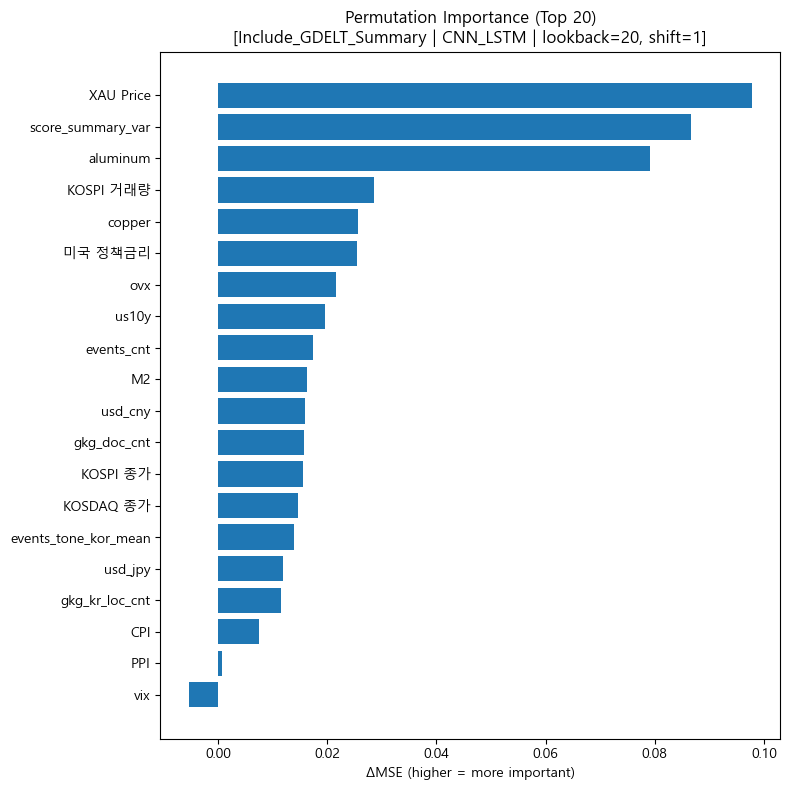

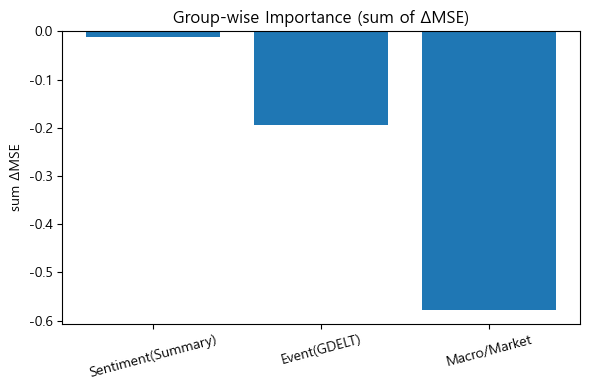

In [7]:
# -------------------------
# 유틸: 케이스/모델로 학습하고, 테스트 시퀀스/스케일러/모델 반환
# -------------------------
def fit_for_importance(case_name="Include_GDELT_Summary",
                       model_name="CNN_LSTM",
                       lookback=20,
                       shift=1,
                       seed=42):
    """
    run_once 내부 로직을 가져와, permutation importance 계산에 필요한 객체를 반환.
    반환:
      model, x_scaler, d_scaler,
      df_case, feats,  # 원본 케이스 DF와 피처 이름 목록
      X_tr_raw, X_te_raw, y_tr_raw, y_te_raw,  # 원시 분할(스케일 전)
      X_te_seq, y_true_te_raw, p_last_te_raw,  # 테스트 시퀀스/정답/직전값
      base_pred, base_mse
    """
    np.random.seed(seed); tf.random.set_seed(seed)

    # 케이스 DF 구성
    df_case = build_case_df(case_name)
    feats = [c for c in df_case.select_dtypes(include=[np.number]).columns if c != TARGET_COL]

    X_all = df_case[feats].values.astype(np.float32)
    y_all = df_case[TARGET_COL].values.astype(np.float32)

    # 분할
    s_tr, s_va, s_te = split_indices(len(df_case), tr_ratio=TRAIN_RATIO, va_ratio=VAL_RATIO)
    X_tr_raw = X_all[s_tr]
    X_te_raw = X_all[s_te]
    y_tr_raw = y_all[s_tr]
    y_te_raw = y_all[s_te]

    # 입력 스케일러 (train 기준)
    x_scaler = RobustScaler()
    X_tr = x_scaler.fit_transform(X_tr_raw)
    X_te = x_scaler.transform(X_te_raw)

    # Δ-타깃 스케일러 (train 기준)
    X_tr_seq_tmp, y_d_tr_raw, _, _ = make_sequences_residual(X_tr, y_tr_raw, lookback, shift=shift)
    if len(X_tr_seq_tmp) == 0:
        raise ValueError("시퀀스 길이 부족(훈련).")
    d_scaler = RobustScaler()
    y_d_tr_sc = d_scaler.fit_transform(y_d_tr_raw.reshape(-1,1)).ravel()

    # 내부 검증 분리(훈련 시퀀스의 10%)
    n_tr_seq = len(X_tr_seq_tmp)
    val_sz = max(1, int(n_tr_seq*0.1))
    X_train, y_train = X_tr_seq_tmp[:-val_sz], y_d_tr_sc[:-val_sz]
    X_valin, y_valin = X_tr_seq_tmp[-val_sz:], y_d_tr_sc[-val_sz:]

    # 테스트 시퀀스 (스케일된 입력, 비스케일 타깃)
    X_te_seq, y_d_te_raw, p_last_te_raw, y_true_te_raw = make_sequences_residual(X_te, y_te_raw, lookback, shift=shift)
    if len(X_te_seq) == 0:
        raise ValueError("시퀀스 길이 부족(테스트).")

    # 모델 학습
    model = build_model(model_name, (lookback, X_train.shape[-1]))
    cbs = [
        EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=0),
    ]
    model.fit(X_train, y_train, validation_data=(X_valin, y_valin),
              epochs=EPOCHS, batch_size=BATCH, callbacks=cbs, verbose=0)

    # 베이스라인 예측/오차
    d_pred_sc = model.predict(X_te_seq, verbose=0).ravel()
    d_pred = d_scaler.inverse_transform(d_pred_sc.reshape(-1,1)).ravel()
    base_pred = p_last_te_raw + d_pred
    base_mse = mean_squared_error(y_true_te_raw, base_pred)

    return (model, x_scaler, d_scaler,
            df_case, feats,
            X_tr_raw, X_te_raw, y_tr_raw, y_te_raw,
            X_te_seq, y_true_te_raw, p_last_te_raw,
            base_pred, base_mse)

# -------------------------
# 유틸: 테스트 입력 한 변수만 섞어서 ΔMSE 계산
# -------------------------
def permute_one_feature_and_score(model, x_scaler, d_scaler,
                                  X_te_raw, y_te_raw,
                                  lookback, shift,
                                  y_true_te_raw, p_last_te_raw,
                                  base_mse,
                                  feat_idx,
                                  n_repeats=5,
                                  rng=None):
    """
    X_te_raw[:, feat_idx]만 무작위로 섞어(다른 피처는 고정),
    동일 스케일링/시퀀스 구성으로 예측 후 MSE 상승(ΔMSE)을 평균.
    """
    if rng is None:
        rng = np.random.RandomState(123)

    deltas = []
    for _ in range(n_repeats):
        Xp_te_raw = X_te_raw.copy()
        rng.shuffle(Xp_te_raw[:, feat_idx])  # 테스트셋 내에서만 섞음

        # 동일 스케일러로 변환 → 동일 시퀀스 구성
        Xp_te = x_scaler.transform(Xp_te_raw)
        Xp_te_seq, y_d_te_raw2, p_last_te_raw2, y_true_te_raw2 = make_sequences_residual(
            Xp_te, y_te_raw, lookback, shift=shift
        )

        # 형태 보호(인덱스가 같지 않으면 여기서 정합성 체크)
        assert np.allclose(y_true_te_raw, y_true_te_raw2), "정합성 오류: y_true 달라짐"
        assert np.allclose(p_last_te_raw, p_last_te_raw2), "정합성 오류: p_last 달라짐"

        d_pred_sc = model.predict(Xp_te_seq, verbose=0).ravel()
        d_pred = d_scaler.inverse_transform(d_pred_sc.reshape(-1,1)).ravel()
        yhat_perm = p_last_te_raw + d_pred

        mse_perm = mean_squared_error(y_true_te_raw, yhat_perm)
        deltas.append(mse_perm - base_mse)

    return float(np.mean(deltas))

# -------------------------
# 그룹 레이블러
# -------------------------
def feature_group_label(col_name):
    if col_name in GDELT_COLS:
        return "Event(GDELT)"
    if col_name.startswith("score_title_"):
        return "Sentiment(Title)"
    if col_name.startswith("score_summary_"):
        return "Sentiment(Summary)"
    if col_name.startswith("score_content_"):
        return "Sentiment(Content)"
    return "Macro/Market"

# -------------------------
# 메인: 퍼뮤테이션 중요도 계산 + 표/그림
# -------------------------
def permutation_importance_pipeline(case_name="Include_GDELT_Summary",
                                    model_name="CNN_LSTM",
                                    lookback=20,
                                    shift=1,
                                    seed=42,
                                    n_repeats=5,
                                    topk=20,
                                    random_state=123):
    (model, x_scaler, d_scaler,
     df_case, feats,
     X_tr_raw, X_te_raw, y_tr_raw, y_te_raw,
     X_te_seq, y_true_te_raw, p_last_te_raw,
     base_pred, base_mse) = fit_for_importance(case_name, model_name, lookback, shift, seed)

    rng = np.random.RandomState(random_state)

    # 각 피처에 대해 ΔMSE 측정
    import_rows = []
    for j, col in enumerate(feats):
        delta = permute_one_feature_and_score(
            model, x_scaler, d_scaler,
            X_te_raw, y_te_raw,
            lookback, shift,
            y_true_te_raw, p_last_te_raw,
            base_mse,
            feat_idx=j,
            n_repeats=n_repeats,
            rng=rng
        )
        import_rows.append((col, delta, feature_group_label(col)))

    imp_df = pd.DataFrame(import_rows, columns=["feature", "importance(ΔMSE)", "group"])
    imp_df = imp_df.sort_values("importance(ΔMSE)", ascending=False).reset_index(drop=True)

    # 그룹 합계
    grp_df = (imp_df.groupby("group", as_index=False)["importance(ΔMSE)"]
              .sum()
              .sort_values("importance(ΔMSE)", ascending=False)
              .reset_index(drop=True))

    # ===== 출력 =====
    print("\n=== Primary Setting ===")
    print(f"Case={case_name}, Model={model_name}, lookback={lookback}, shift={shift}, seed={seed}")
    print(f"Baseline Test MSE={base_mse:.3f}, RMSE={np.sqrt(base_mse):.3f}")

    print("\n=== Permutation Importance (ΔMSE) — Top {} ===".format(topk))
    display(imp_df.head(topk))

    print("\n=== Group-wise Importance (sum of ΔMSE) ===")
    display(grp_df)

    # ===== 시각화 =====
    # Top-K Features
    top = imp_df.head(topk).iloc[::-1]  # 바차트 위에서 아래로 정렬
    plt.figure(figsize=(8, max(4, 0.4*len(top))))
    plt.barh(top["feature"], top["importance(ΔMSE)"])
    plt.title(f"Permutation Importance (Top {topk})\n[{case_name} | {model_name} | lookback={lookback}, shift={shift}]")
    plt.xlabel("ΔMSE (higher = more important)")
    plt.tight_layout()
    plt.show()

    # Group-wise bar
    plt.figure(figsize=(6,4))
    plt.bar(grp_df["group"], grp_df["importance(ΔMSE)"])
    plt.title("Group-wise Importance (sum of ΔMSE)")
    plt.ylabel("sum ΔMSE")
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

    return imp_df, grp_df, dict(base_mse=base_mse)

# =========================
# 실행 예시 (베스트 설정 기반)
# =========================
best_case = "Include_GDELT_Summary"   
best_model = "CNN_LSTM"
best_lb = 20
best_shift = 1
best_seed = 42

imp_df, grp_df, base_info = permutation_importance_pipeline(
    case_name=best_case,
    model_name=best_model,
    lookback=best_lb,
    shift=best_shift,
    seed=best_seed,
    n_repeats=5,     # 시간/정확도 균형.
    topk=20,
    random_state=123
)

# CSV 저장
imp_df.to_csv("perm_importance_features.csv", index=False, encoding="utf-8-sig")
grp_df.to_csv("perm_importance_groups.csv", index=False, encoding="utf-8-sig")

# 시각화

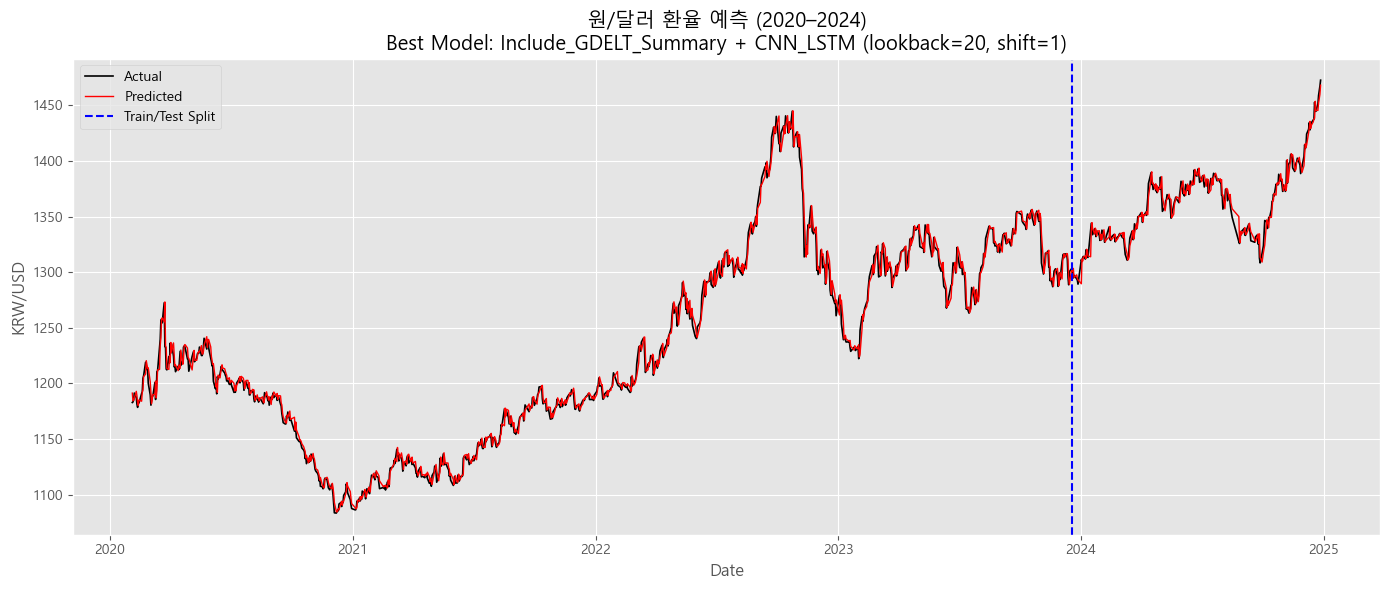

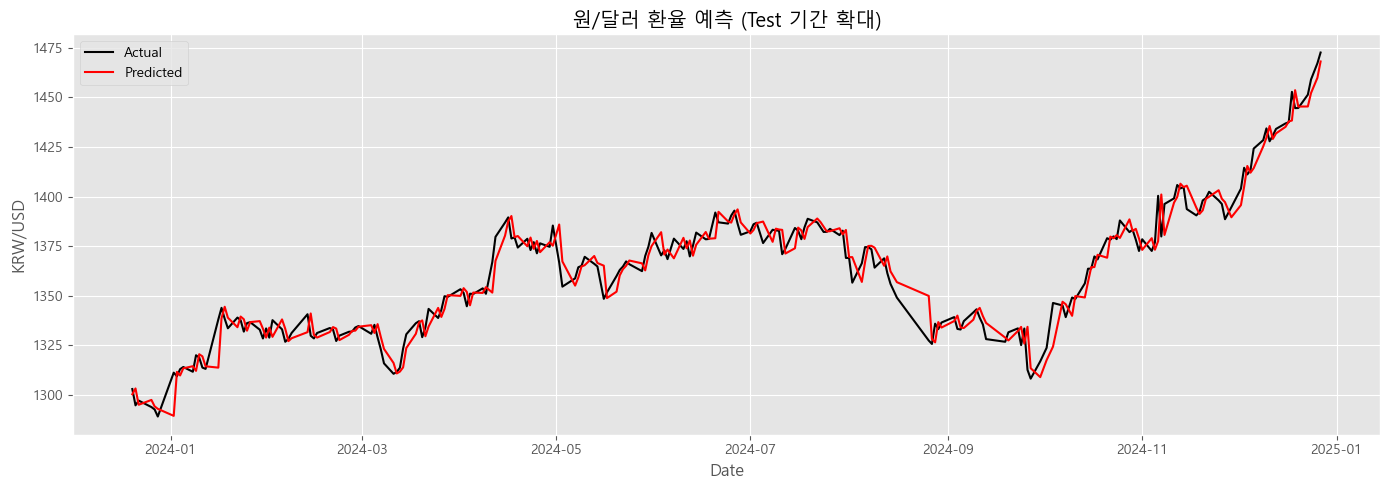

Test Performance: MSE=50.088, RMSE=7.077, MAE=5.383, MAPE=0.395%


(array(['2020-02-04T00:00:00.000000000', '2020-02-05T00:00:00.000000000',
        '2020-02-06T00:00:00.000000000', ...,
        '2024-12-24T00:00:00.000000000', '2024-12-26T00:00:00.000000000',
        '2024-12-27T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([1182.9 , 1183.4 , 1185.28, ..., 1458.93, 1467.08, 1472.5 ],
       dtype=float32),
 array([1191.2899, 1184.4052, 1184.9153, ..., 1452.1064, 1459.7676,
        1467.9902], dtype=float32))

In [15]:
def refit_and_plot_full(best_case="Include_GDELT_Summary",
                        best_model="CNN_LSTM",
                        lookback=20,
                        shift=1,
                        seed=42):
    """
    베스트 설정으로 전체 데이터(2020–2024)를 학습·예측하고 그래프를 그림.
    - Train/Test split은 그대로 두되, 전체 예측 시퀀스를 연결.
    """
    np.random.seed(seed); tf.random.set_seed(seed)

    # 케이스 데이터 준비
    df_case = build_case_df(best_case)
    feats = [c for c in df_case.select_dtypes(include=[np.number]).columns if c != TARGET_COL]

    X_all = df_case[feats].values.astype(np.float32)
    y_all = df_case[TARGET_COL].values.astype(np.float32)
    # 날짜는 실제 날짜 컬럼 사용
    dates_all = df_case[DATE_COL].to_numpy()

    # split
    s_tr, s_va, s_te = split_indices(len(df_case), tr_ratio=TRAIN_RATIO, va_ratio=VAL_RATIO)

    # 스케일링
    x_scaler = RobustScaler()
    X_tr = x_scaler.fit_transform(X_all[s_tr])
    X_all_scaled = x_scaler.transform(X_all)

    d_scaler = RobustScaler()
    X_tr_seq_tmp, y_d_tr_raw, _, _ = make_sequences_residual(
        X_tr, y_all[s_tr], lookback, shift=shift
    )
    y_d_tr_sc = d_scaler.fit_transform(y_d_tr_raw.reshape(-1,1)).ravel()

    # 내부 train/val 분리
    n_tr_seq = len(X_tr_seq_tmp)
    val_sz = max(1, int(n_tr_seq*0.1))
    X_train, y_train = X_tr_seq_tmp[:-val_sz], y_d_tr_sc[:-val_sz]
    X_val, y_val = X_tr_seq_tmp[-val_sz:], y_d_tr_sc[-val_sz:]

    # 모델 빌드 & 학습
    model = build_model(best_model, (lookback, X_train.shape[-1]))
    cbs = [
        EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True, verbose=0),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=0),
    ]
    model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=EPOCHS, batch_size=BATCH, callbacks=cbs, verbose=0)

    # ===== 전체 구간 예측 =====
    X_all_seq, y_d_all_raw, p_last_all_raw, y_true_all_raw = make_sequences_residual(
        X_all_scaled, y_all, lookback, shift=shift
    )
    d_pred_sc = model.predict(X_all_seq, verbose=0).ravel()
    d_pred = d_scaler.inverse_transform(d_pred_sc.reshape(-1,1)).ravel()
    yhat_all = p_last_all_raw + d_pred

    # 실제/예측 길이 맞추기 (dates는 lookback+shift-1부터 시작)
    dates_plot = dates_all[lookback + shift - 1:]
    y_true_plot = y_true_all_raw
    yhat_plot = yhat_all

    # 안전하게 길이 통일 (오프바이원 방지)
    L = min(len(dates_plot), len(y_true_plot), len(yhat_plot))
    dates_plot = dates_plot[:L]
    y_true_plot = y_true_plot[:L]
    yhat_plot = yhat_plot[:L]

    # Train/Test split 라인 위치 (dates 기준으로도 보정)
    split_idx = s_tr.stop - 1  # train 마지막 원시 인덱스
    split_date_idx = split_idx - (lookback + shift - 1)
    if 0 <= split_date_idx < len(dates_plot):
        split_date_val = dates_plot[split_date_idx]
    else:
        split_date_val = None

    # ===== 시각화 =====
    plt.figure(figsize=(14,6))
    plt.plot(dates_plot, y_true_plot, label="Actual", color="black", linewidth=1.2)
    plt.plot(dates_plot, yhat_plot, label="Predicted", color="red", linewidth=1.0)
    if split_date_val is not None:
        plt.axvline(split_date_val, color="blue", linestyle="--", label="Train/Test Split")
    plt.title(f"원/달러 환율 예측 (2020–2024)\nBest Model: {best_case} + {best_model} (lookback={lookback}, shift={shift})")
    plt.xlabel("Date"); plt.ylabel("KRW/USD")
    plt.legend(); plt.tight_layout(); plt.show()

    # ===== 확대 (Test 기간만) =====
    # test 시작도 dates 기준으로 보정
    test_start_raw = s_te.start  # 원시 인덱스
    test_start_seq = test_start_raw - (lookback + shift - 1)
    test_start_seq = max(0, test_start_seq)
    plt.figure(figsize=(14,5))
    plt.plot(dates_plot[test_start_seq:], y_true_plot[test_start_seq:], label="Actual", color="black")
    plt.plot(dates_plot[test_start_seq:], yhat_plot[test_start_seq:], label="Predicted", color="red")
    plt.title("원/달러 환율 예측 (Test 기간 확대)")
    plt.xlabel("Date"); plt.ylabel("KRW/USD")
    plt.legend(); plt.tight_layout(); plt.show()

    # 메트릭 계산 (test 구간만)
    y_true_test = y_true_plot[test_start_seq:]
    y_hat_test  = yhat_plot[test_start_seq:]
    mse = mean_squared_error(y_true_test, y_hat_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true_test, y_hat_test)
    mape = np.mean(np.abs((y_true_test - y_hat_test) / y_true_test)) * 100
    print(f"Test Performance: MSE={mse:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, MAPE={mape:.3f}%")

    return dates_plot, y_true_plot, yhat_plot

refit_and_plot_full(best_case="Include_GDELT_Summary",
                        best_model="CNN_LSTM",
                        lookback=20,
                        shift=1,
                        seed=42)

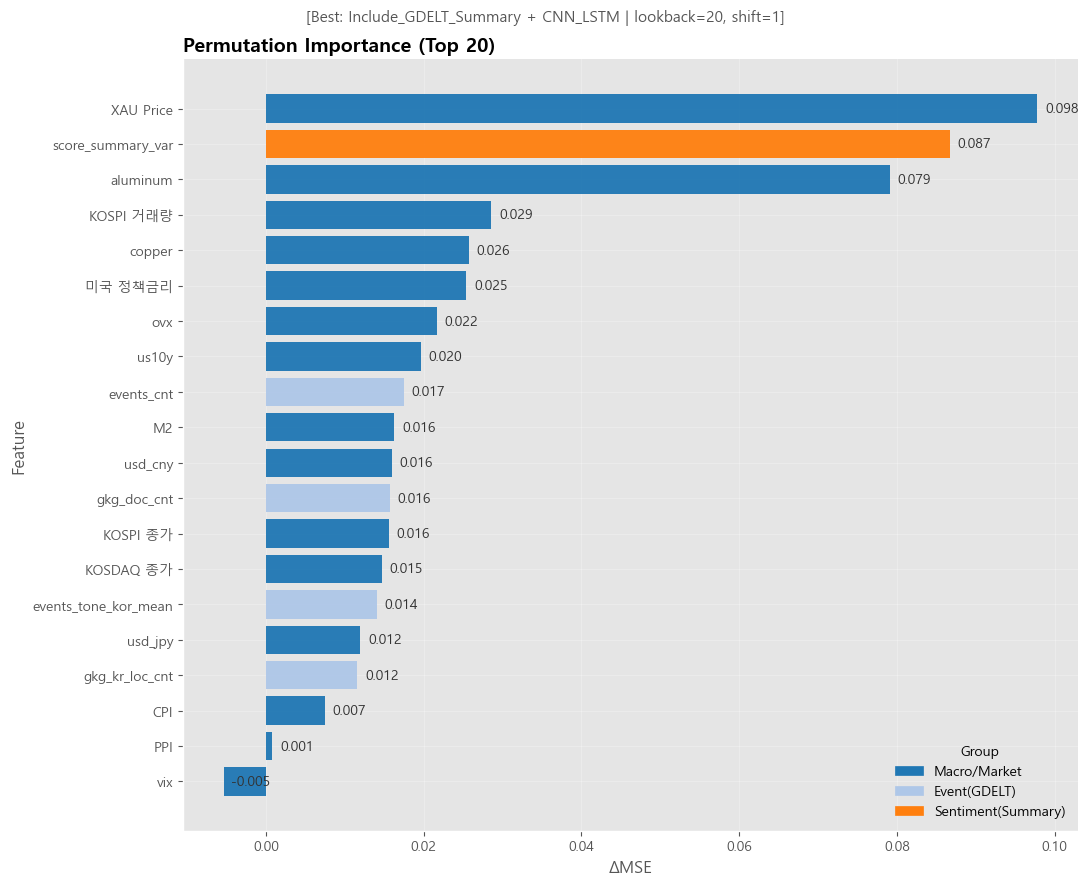

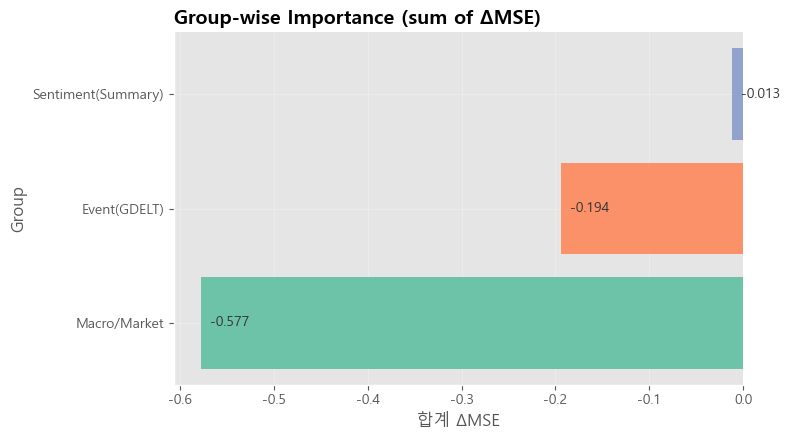

In [13]:
def _nice_axes(ax):
    ax.grid(True, alpha=0.25, linewidth=0.8)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

def plot_perm_importance_topk(imp_df, topk=20, title="Permutation Importance (Top 20)", subtitle=None):
    """
    imp_df: columns = ["feature", "importance(ΔMSE)", "group"]
    """
    _set_korean_font()
    plt.style.use("ggplot")  # 기본 톤 잡기

    top = imp_df.sort_values("importance(ΔMSE)", ascending=False).head(topk).iloc[::-1]
    values = top["importance(ΔMSE)"].values
    labels = top["feature"].values
    groups = top["group"].values

    # 그룹별 색상 자동 할당
    unique_groups = list(dict.fromkeys(groups))  # 순서 보존
    cmap = mpl.colormaps.get_cmap("tab20")
    color_map = {g: cmap(i % cmap.N) for i, g in enumerate(unique_groups)}
    colors = [color_map[g] for g in groups]

    fig, ax = plt.subplots(figsize=(11, max(5, 0.45*len(top))))
    bars = ax.barh(labels, values, color=colors, edgecolor="none", alpha=0.95)
    _nice_axes(ax)

    # 값 라벨 (막대 끝)
    for b, v in zip(bars, values):
        ax.text(v + (values.max()*0.01), b.get_y() + b.get_height()/2,
                f"{v:.3f}", va="center", ha="left", fontsize=10, color="#333333")

    # 범례 (그룹)
    handles = [mpl.patches.Patch(color=color_map[g], label=g) for g in unique_groups]
    leg = ax.legend(handles=handles, title="Group", frameon=False, ncol=1, loc="lower right")

    ax.set_xlabel("ΔMSE")
    ax.set_ylabel("Feature")
    ax.set_title(title, loc="left", pad=6, fontsize=14, fontweight="bold")
    if subtitle:
        fig.suptitle(subtitle, y=0.98, fontsize=11, color="#555555")
    fig.tight_layout()
    plt.show()

def plot_group_importance(grp_df, title="Group-wise Importance (sum of ΔMSE)"):
    """
    grp_df: columns = ["group", "importance(ΔMSE)"]
    """
    _set_korean_font()
    plt.style.use("ggplot")

    df = grp_df.sort_values("importance(ΔMSE)", ascending=True)
    values = df["importance(ΔMSE)"].values
    labels = df["group"].values

    cmap = mpl.colormaps.get_cmap("Set2")
    colors = [cmap(i % cmap.N) for i in range(len(df))]

    fig, ax = plt.subplots(figsize=(8, 4.5))
    bars = ax.barh(labels, values, color=colors, edgecolor="none", alpha=0.95)
    _nice_axes(ax)

    for b, v in zip(bars, values):
        ax.text(v + (values.max()*0.02 if values.max()>0 else 0.01),
                b.get_y() + b.get_height()/2,
                f"{v:.3f}", va="center", ha="left", fontsize=10, color="#333333")

    ax.set_xlabel("합계 ΔMSE")
    ax.set_ylabel("Group")
    ax.set_title(title, loc="left", pad=6, fontsize=14, fontweight="bold")
    fig.tight_layout()
    plt.show()

# ==========
plot_perm_importance_topk(imp_df, topk=20,
    title="Permutation Importance (Top 20)",
    subtitle="[Best: Include_GDELT_Summary + CNN_LSTM | lookback=20, shift=1]")
plot_group_importance(grp_df, title="Group-wise Importance (sum of ΔMSE)")